**Installing the necessary library and data collection**

In [2]:
import pandas as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [3]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

**1. DATA CLEANING**

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(7)

,v1,v2
2712,ham,Hey you still want to go for yogasana? Coz if ...
1559,ham,Single line with a big meaning::::: \Miss anyt...
1825,ham,Wat makes some people dearer is not just de ha...
5544,ham,"I'm taking derek &amp; taylor to walmart, if I..."
1188,ham,All will come alive.better correct any good lo...
1627,spam,You have been selected to stay in 1 of 250 top...
5483,ham,So li hai... Me bored now da lecturer repeatin...


In [10]:
df.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().value_counts()

False    5169
dtype: int64

In [13]:
df = df.rename(columns={'v2': 'text', 'v1': 'target'})
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


 **0-----> HAM**


**1-----> SPAM**

In [14]:
label=LabelEncoder()
df['target']=label.fit_transform(df['target'])
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
df.shape


(5169, 2)

**2.EDA**

In [16]:
class_dist= df['target'].value_counts()/len(df)*100
class_dist

0    87.366996
1    12.633004
Name: target, dtype: float64

it is a imbalance dataset as we can see there is 87% ham and only 12% is spam

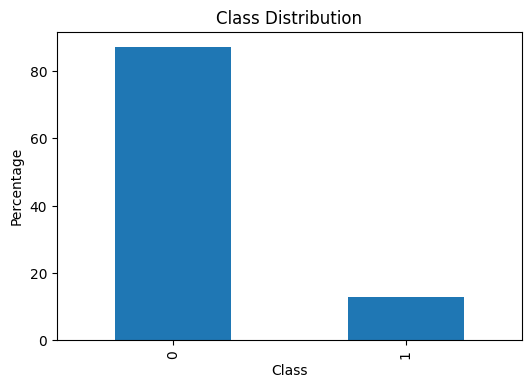

In [17]:
# Create a bar plot
plt.figure(figsize=(6, 4))
class_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Distribution')
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

now we will do some feature engineering
we will add 3 columns i.e num_words,num_characters and num_sentences

In [19]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [23]:
#checking statistical value for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#checking statistical value for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

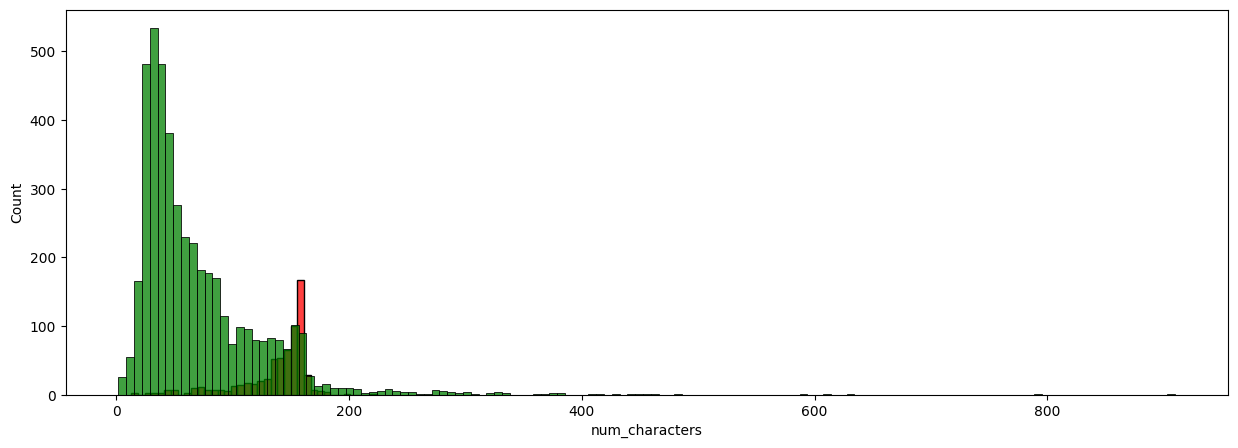

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

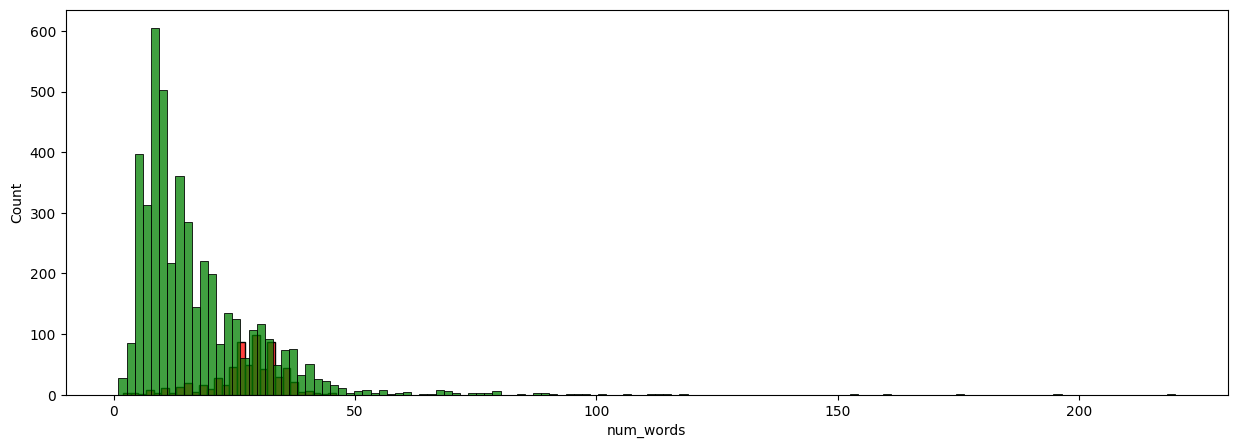

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
sns.histplot(df[df['target'] == 0]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

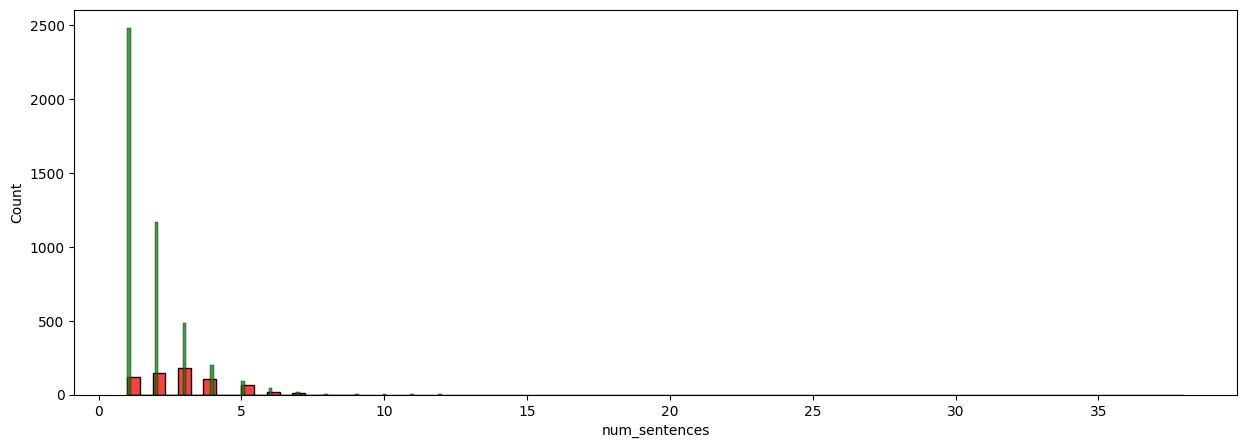

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
sns.histplot(df[df['target'] == 0]['num_sentences'],color='green')

**3.Data Preprocessing**

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [28]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# Initialize a Porter Stemmer
ps = PorterStemmer()

In [31]:
def text_preprocessing(text):
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]
    preprocessed_words = [ps.stem(word) for word in filtered_words]
    preprocessed_text = ' '.join(preprocessed_words)
    return preprocessed_text

In [32]:

text = "This is an examples of the angle faiz khan 20% i shouldn't sentences, with special characters!%% It needs to be preprocessing."
preprocessed_text = text_preprocessing(text)
print(preprocessed_text)


exampl angl faiz khan 20 n't sentenc special charact need preprocess


In [33]:
df['transformed_text'] = df['text'].apply(text_preprocessing)

In [34]:
df.head(5)

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah n't think goe usf live around though


In [35]:
wc=WordCloud(width=250,height=250,min_font_size=10,background_color='black')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'spam message word cloud')

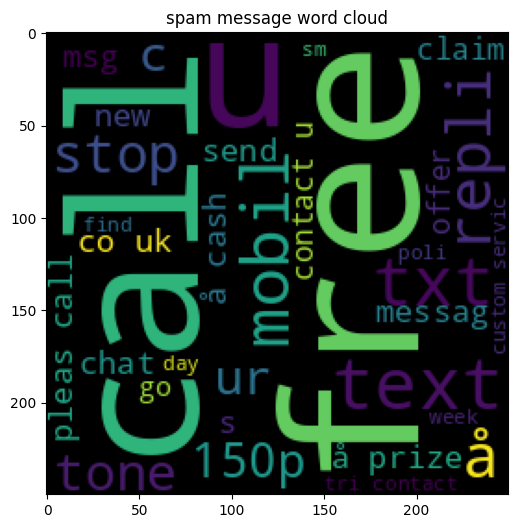

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('spam message word cloud')

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'ham message word cloud')

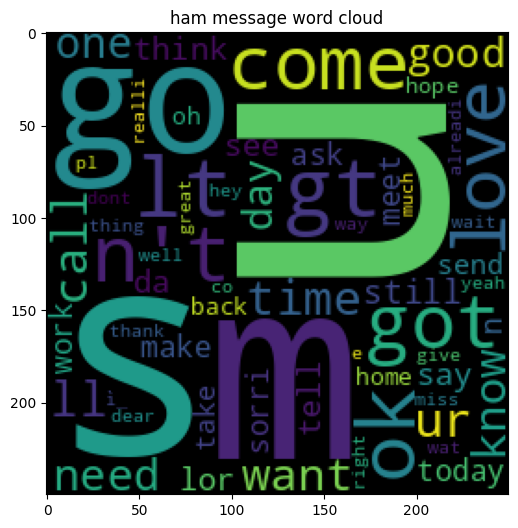

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('ham message word cloud')

In [40]:
spam_col= df[df['target']==1]['transformed_text'].tolist()

In [41]:
spam_words = []
for msg in spam_col:
  for word in msg.split():
    spam_words.append(word)


In [42]:
s_word_counts = Counter(spam_words)

In [43]:
s_most_common_words = s_word_counts.most_common(60)

In [44]:
# Extract words and their counts for plotting
words, counts = zip(*s_most_common_words)

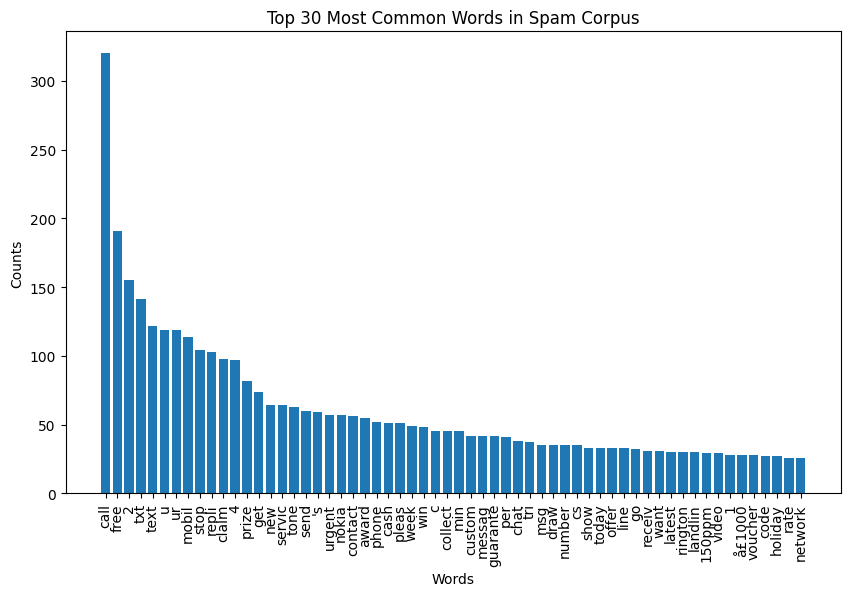

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [46]:
ham_col= df[df['target']==0]['transformed_text'].tolist()

In [47]:
ham_words = []
for msg in ham_col:
  for word in msg.split():
    ham_words.append(word)

In [48]:
hword_counts = Counter(ham_words)

In [49]:
hmost_common_words = hword_counts.most_common(60)

In [50]:
# Extract words and their counts for plotting
words, counts = zip(*hmost_common_words)

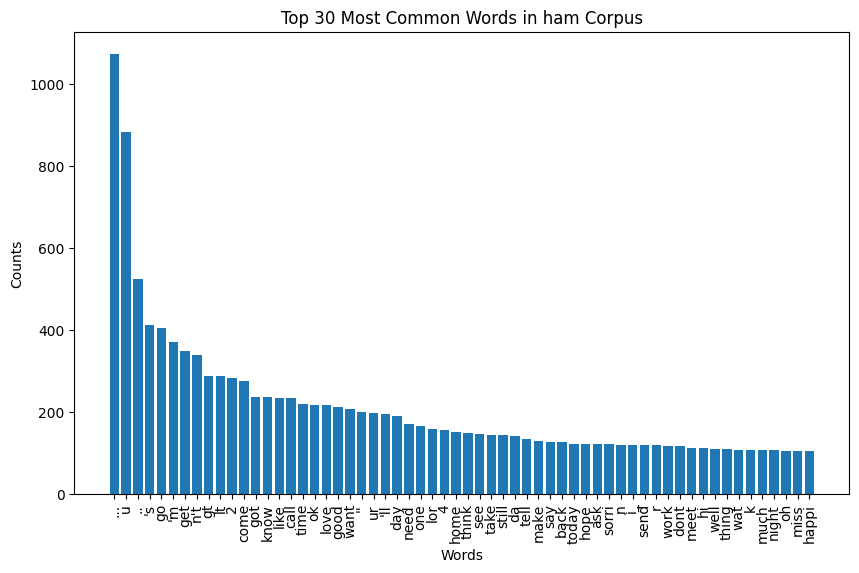

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 30 Most Common Words in ham Corpus')
plt.show()

**MODEL BUILDING**

In [52]:
cv=CountVectorizer()

In [53]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [54]:
y=df['target'].values

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[796 100]
 [ 13 125]]
0.5555555555555556


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[880  16]
 [ 11 127]]
0.8881118881118881


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[893   3]
 [ 21 117]]
0.975


since the data is imbalance the accuracy does not matter that much as precision
and therefore till now BernoulliNB is oerforming the best with countvectorizer
with the precision score of 0.975 till now

we will try for tfidf now


In [60]:
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
y=df['target'].values

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


ohhoooo great now we can see with tfidf the precision of MultinomialNB and BernoulliNB are 1 which state that there is no message which is not spam and classified as spam which is rquired here as we want true positive.

we can go with either mnb or bnb

i choose BernoulliNB as it has highest precision and and accuracy

In [67]:
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
y=df['target'].values

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [85]:
# Preprocess the new data
new_data = ["Congratulations! You've won a free iPhone X! To claim your prize, click on this link now",
            "Hello faiz khan how are you?",
            "Win a $1,000 gift card! Click here to claim your prize now!",
            "Thnks yaar, we'll meet there okay",
            "Win a free cruise! Call now to claim your prize!",
            "URGENT: Your bank account has been compromised. Please click on the link below to verify your account information immediately or your account will be suspended"]
preprocessed_new_data = [text_preprocessing(text) for text in new_data]
tfidf_new_data = tfidf.transform(preprocessed_new_data)
predictions = bnb.predict(tfidf_new_data)

for i, text in enumerate(new_data):
    if predictions[i] == 0:
        print(f"Message {i+1}:")
        print(text)
        print("This message is not spam.\n")
    else:
        print(f"Message {i+1}:")
        print(text)
        print("This message is spam.\n")

Message 1:
Congratulations! You've won a free iPhone X! To claim your prize, click on this link now
This message is spam.

Message 2:
Hello faiz khan how are you?
This message is not spam.

Message 3:
Win a $1,000 gift card! Click here to claim your prize now!
This message is spam.

Message 4:
Thnks yaar, we'll meet there okay
This message is not spam.

Message 5:
Win a free cruise! Call now to claim your prize!
This message is spam.

Message 6:
URGENT: Your bank account has been compromised. Please click on the link below to verify your account information immediately or your account will be suspended
This message is spam.

